In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import json
from perceptron import plot, Classifier
%matplotlib inline

In [2]:
with open('train_01.json') as f:
    d1 = json.load(f)
with open('train_02.json') as f:
    d2 = json.load(f)

In [3]:
d = []
r = {'inside':-1, 'outside':1}
for k in d1.keys():
    _df = pd.DataFrame(d1[k], columns=['A', 'B'])
    _df['class'] = r[k]
    d.append(_df)
df1 = pd.concat(d, axis=0, ignore_index=True)

In [4]:
d = []
r = {'inside':-1, 'outside':1}
for k in d2.keys():
    _df = pd.DataFrame(d2[k], columns=['A', 'B'])
    _df['class'] = r[k]
    d.append(_df)
df2 = pd.concat(d, axis=0, ignore_index=True)

In [5]:
df1

,A,B,class
0,0.729520,0.728634,-1
1,0.826506,0.940316,-1
2,0.602314,0.489100,-1
3,0.792430,0.972460,-1
4,0.373906,0.380795,-1
5,0.521383,0.701165,-1
6,0.579949,0.860210,-1
7,0.447271,0.232087,-1
8,0.826693,0.970862,-1
9,0.209609,0.079489,-1


In [12]:
train1, test1 = train_test_split(df1, test_size=0.2)

In [7]:
train2, test2 = train_test_split(df2, test_size=0.2)

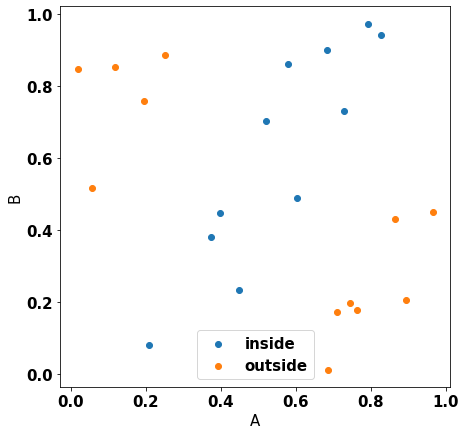

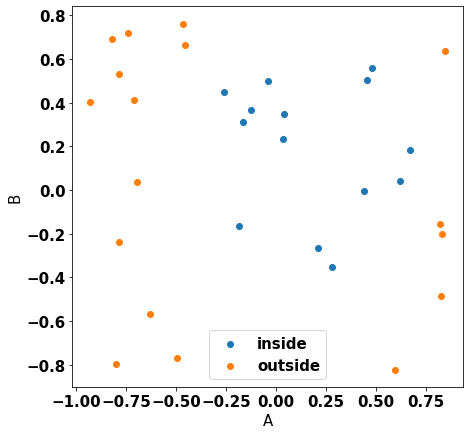

In [13]:
plot(train1)
plot(train2)

# so we need to use quadratic forms

A     -0.993037
B      0.704990
A2     6.810913
B2     4.111089
2AB   -4.733302
C     -0.820578
Name: 0, dtype: float64


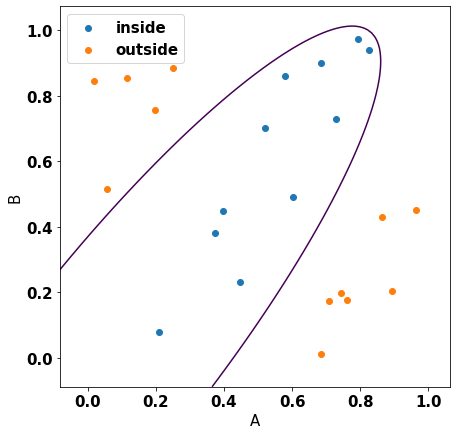

In [14]:
C = Classifier(train1)
C.train()

In [15]:
dftest1 = C.test(test1)
test1.join(dftest1.set_index(['A', 'B']), on=['A', 'B']).drop(columns=['A2','B2', '2AB','C'])

,A,B,class,class_detected
8,0.826693,0.970862,-1,-1
27,0.128520,0.798343,1,1
14,0.846590,0.126805,1,1
21,0.073085,0.706869,1,1
13,0.261937,0.207272,-1,-1
10,0.338326,0.411363,-1,-1


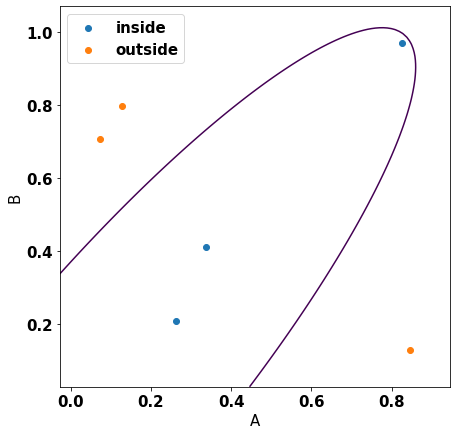

In [16]:
C.plot(test1)

A     -0.382106
B     -0.557377
A2     2.918678
B2     2.140834
2AB   -0.519177
C     -1.611143
Name: 0, dtype: float64


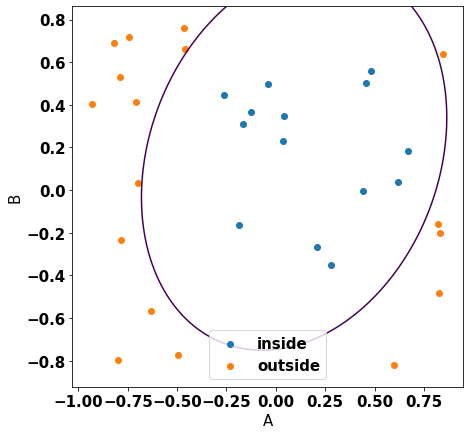

In [17]:
C2 = Classifier(train2)
C2.train()

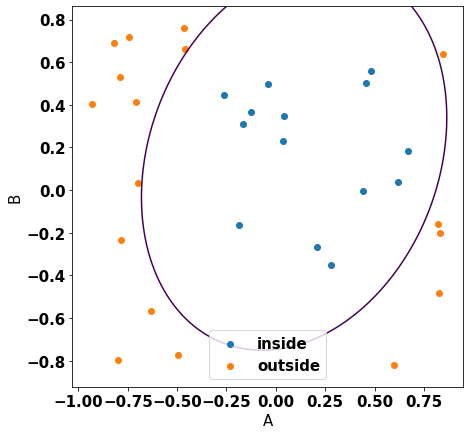

In [18]:
C2.plot(C2.df)

In [19]:
dftest2 = C2.test(test2)
test2.join(dftest2.set_index(['A', 'B']), on=['A', 'B']).drop(columns=['A2','B2', '2AB','C'])

,A,B,class,class_detected
34,0.866567,0.090772,1,1
10,0.642289,-0.003541,-1,-1
15,0.495335,0.298197,-1,-1
38,-0.584470,0.828778,1,1
4,0.199091,-0.207021,-1,-1
28,-0.637788,0.566488,1,1
9,0.074489,-0.497364,-1,-1
18,0.230463,-0.013246,-1,-1


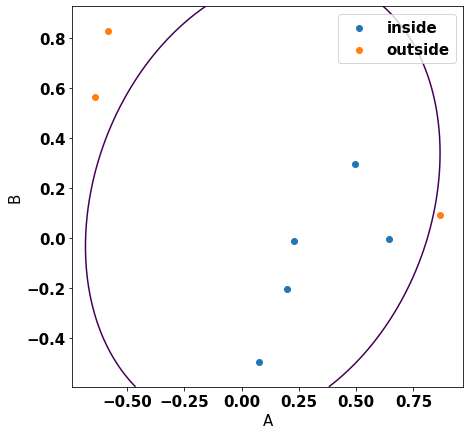

In [20]:
C2.plot(test2)